In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 20
# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

In [3]:
X

array([-1.15640306, -1.8603226 ,  1.52435405,  2.86506585,  2.75572494,
       -2.3732427 , -0.61253422,  4.45028612,  2.2349534 ,  4.33713822,
       -0.50912653, -4.26148148, -0.28688601, -1.73382109, -3.27899839,
       -3.14329062, -4.11249875,  2.96319528, -2.74354582, -1.3754802 ])

In [6]:
# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

In [7]:
Y

array([-1.01915748, -1.34515365,  1.87086854, -0.67140545,  0.09274392,
       -0.30429381, -3.27270323,  0.96431702, -1.7310373 ,  1.45275779,
       -1.69327198, -1.89145201, -1.36278371, -3.29769322, -2.64885593,
       -1.84975573, -3.06896498, -0.56021903, -3.23487197, -3.11814597])

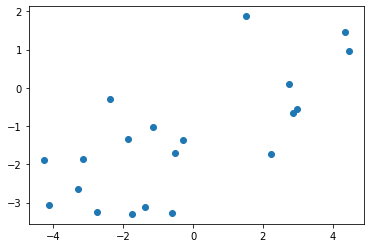

In [8]:
plt.scatter(X,Y)

In [9]:
# create the linear regression model
model = nn.Linear(1,1)

In [10]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [11]:
# in ML we want our data to be of shape: (num_samples x num_dimensions)
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [12]:
X

array([[-1.15640306],
       [-1.8603226 ],
       [ 1.52435405],
       [ 2.86506585],
       [ 2.75572494],
       [-2.3732427 ],
       [-0.61253422],
       [ 4.45028612],
       [ 2.2349534 ],
       [ 4.33713822],
       [-0.50912653],
       [-4.26148148],
       [-0.28688601],
       [-1.73382109],
       [-3.27899839],
       [-3.14329062],
       [-4.11249875],
       [ 2.96319528],
       [-2.74354582],
       [-1.3754802 ]])

In [13]:
# pytorch uses float32 by default
# numpy uses float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [14]:
inputs

tensor([[-1.1564],
        [-1.8603],
        [ 1.5244],
        [ 2.8651],
        [ 2.7557],
        [-2.3732],
        [-0.6125],
        [ 4.4503],
        [ 2.2350],
        [ 4.3371],
        [-0.5091],
        [-4.2615],
        [-0.2869],
        [-1.7338],
        [-3.2790],
        [-3.1433],
        [-4.1125],
        [ 2.9632],
        [-2.7435],
        [-1.3755]])

In [15]:
type(inputs)

torch.Tensor

In [16]:
# train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # forward paa
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  
  # keep the loss so that we can plot it later
  losses.append(loss.item())

  # backward and optimize
  loss.backward()
  optimizer.step()

  print(f"Epoch {it+1}/{n_epochs}, loss: {loss.item():.4f}")

Epoch 1/30, loss: 11.8439
Epoch 2/30, loss: 3.9078
Epoch 3/30, loss: 1.8974
Epoch 4/30, loss: 1.3809
Epoch 5/30, loss: 1.2436
Epoch 6/30, loss: 1.2042
Epoch 7/30, loss: 1.1911
Epoch 8/30, loss: 1.1858
Epoch 9/30, loss: 1.1831
Epoch 10/30, loss: 1.1816
Epoch 11/30, loss: 1.1807
Epoch 12/30, loss: 1.1801
Epoch 13/30, loss: 1.1797
Epoch 14/30, loss: 1.1795
Epoch 15/30, loss: 1.1793
Epoch 16/30, loss: 1.1792
Epoch 17/30, loss: 1.1791
Epoch 18/30, loss: 1.1791
Epoch 19/30, loss: 1.1791
Epoch 20/30, loss: 1.1790
Epoch 21/30, loss: 1.1790
Epoch 22/30, loss: 1.1790
Epoch 23/30, loss: 1.1790
Epoch 24/30, loss: 1.1790
Epoch 25/30, loss: 1.1790
Epoch 26/30, loss: 1.1790
Epoch 27/30, loss: 1.1790
Epoch 28/30, loss: 1.1790
Epoch 29/30, loss: 1.1790
Epoch 30/30, loss: 1.1790


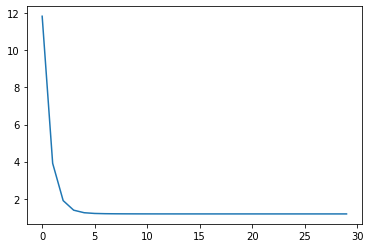

In [17]:
plt.plot(losses)

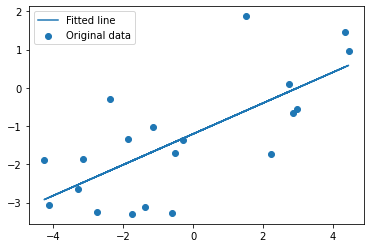

In [18]:
# plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y,label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [19]:
# important!
# in order to test the efficiency of our model, synthetic data is useful
# why?
# because ***we know the answer***
# true values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.40287742]] [-1.2067078]
